# Error surface in weight space
# Logistic regression



Plot cost function $J$ in weights space.
$$ J_i = - y_i\: log(h_i) \; - \; (1 - y_i) \: log(1 - h_i) \;\; (3) $$

$$ J = - \frac{1}{m} \sum_{i} J_i  \;\;\;\;\;\; (4) $$

Each sample is  $y = ax + b$, where $a$ and $b$ - weights. $y$ and $x$ are fixed for each sample.


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [2]:
import math, sys

## Logistic regression

Each sample is  $(x , y)$. Weights $a$ and $b$. $y$ and $x$ are fixed for each sample.

$$ z = ax + b \;\;\;\;\;\; (1)$$

$$ h = \frac{1}{1+e^{-z}} \;\; (2) $$



### Weight b as function of a, x, y

$$ h = \frac{1}{1+e^{-z}} \; => \;  e^{-z} = \frac{1}{h} - 1 $$

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


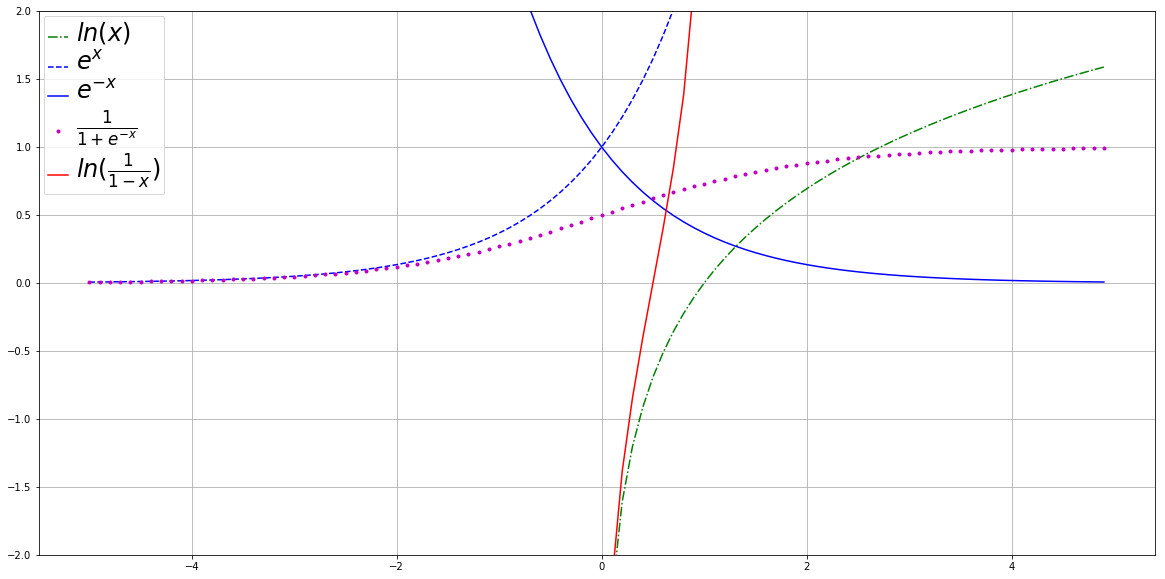

In [3]:
x = np.arange(-5, 5, 0.1)
func_exp = map(lambda x_: np.exp(x_), x)
func_exp_minus = map(lambda x_: np.exp(-1. * x_), x)
func_logistic = map(lambda x_: 1 / (1 + np.exp(-1.*x_)), x)
func_z = map(lambda x_: np.log(x_ /(1-x_)), x)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x, np.log(x), 'g-.', label="$ln(x)$")
ax.plot(x, func_exp, 'b--', label="$e^x$")
ax.plot(x, func_exp_minus, 'b-', label="$e^{-x}$")
ax.plot(x, func_logistic, 'm.', label="$\\frac{1}{1+e^{-x}}$")
ax.plot(x, func_z, 'r-', label="$ln(\\frac{1}{1-x})$")
#ax.set_yscale('log')
ax.set_ylim([-2,2])
ax.grid()
ax.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
plt.setp(ltext, fontsize='24')    # the legend text fontsize
plt.show()

$$ h = \frac{1}{1+e^{-z}} \;\; (2) $$

$$ => \;\;\; z \; = - ln\,(\frac{1}{h} -1) $$

$$  => \;\;\; z = -ln( \frac{1-h}{h} ) = ln ( \frac{h}{1-h} ) $$  

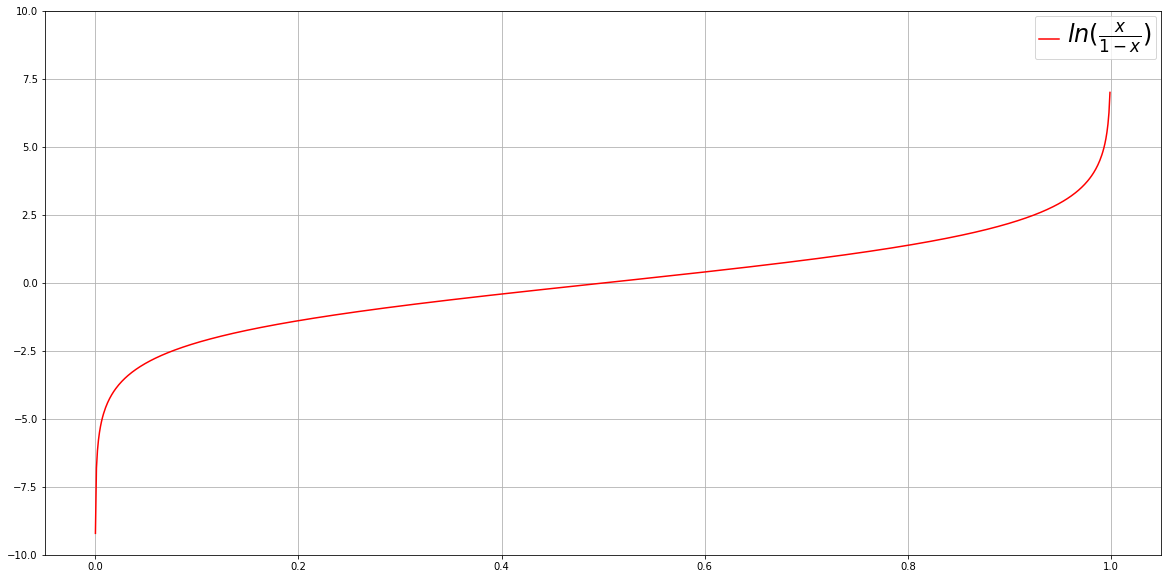

In [4]:
x = np.arange(0.0001, 1, 0.001)
func_z = map(lambda x_: np.log(x_/(1-x_)), x)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x, func_z, 'r-', label="$ln(\\frac{x}{1-x})$")
#ax.set_yscale('log')
ax.set_ylim([-10,10])
ax.grid()
ax.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
plt.setp(ltext, fontsize='24')    # the legend text fontsize
plt.show()

$$ b = z - ax \;\;\;  => $$

$$ b  = ln( \frac{h}{1-h} ) - ax \;\;\; (5)$$ 

## Logistic regression cost function

$$ J_i = - y_i\: log(h_i) \; - \; (1 - y_i) \: log(1 - h_i) \;\; (3) $$


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


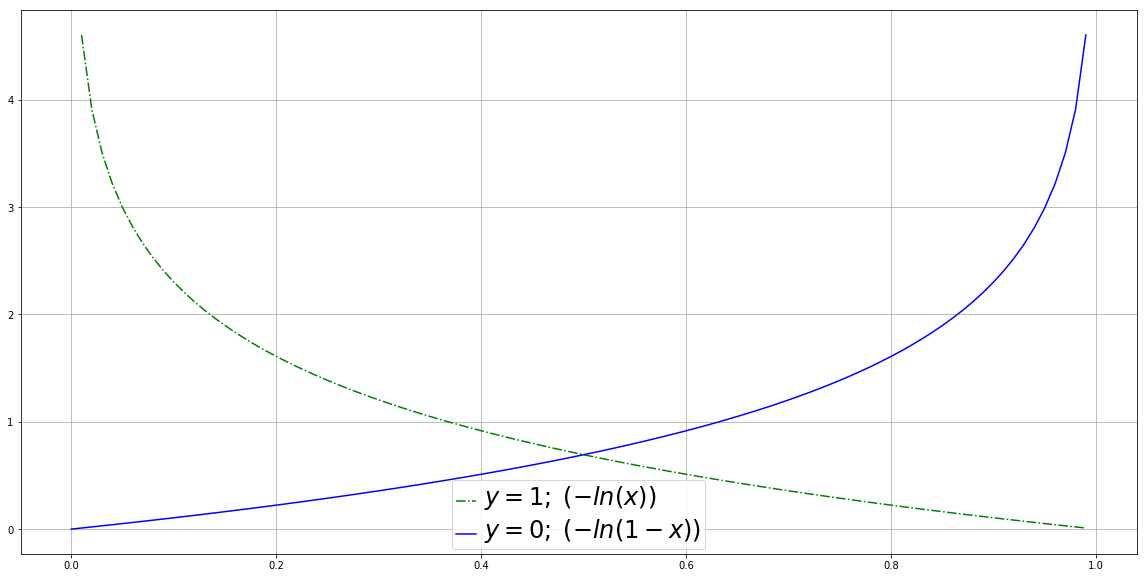

In [5]:
x = np.arange(0,1,0.01)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x, -np.log(x), 'g-.', label="$y=1; \; (-ln(x))$")
ax.plot(x, -np.log(1-x), 'b-', label="$y=0; \; (-ln(1-x))$")
#ax.set_yscale('log')
#ax.set_ylim([-2,2])
ax.grid()
ax.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
plt.setp(ltext, fontsize='24')    # the legend text fontsize
plt.show()

In [6]:
# Return function h(a,b) for fixed x
def sample_func(x):
    def res(a,b):
        z = a*x + b
        h = 1/(1 + np.exp(-z))
        return h
    return res

In [7]:
# Error for one sample 
# Logistic formula (3)
def error_func(h,y):
    J = -y * np.log(h) - (1 - y) * np.log(1 - h)
    return J

In [23]:
# Plots square error for one sample in weights space.
# Samples are functions y(x).
def plot_error_in_weight(sample, title):
    # y = ax + b
    # sample = [x , y]
    alim = [-4.,4.,.1]
    blim = [-4.,4.,.1]    
    a = np.arange(alim[0], alim[1]+alim[2], alim[2])
    b = np.arange(blim[0], blim[1]+blim[2], blim[2])
    A, B = np.meshgrid(a, b)

    h_ = sample_func(sample[0])
    h = h_(A,B)
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(h.min(), h.max())
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(2, 2, 1)
    ax0.contourf(a, b, h, cmap=cmap, levels=levels)
    
    ax0.set_xlim(alim[0], alim[1])
    ax0.set_ylim(blim[0], blim[1])
    ax0.set_ylabel("B")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title("$h(a,b)$ " + title, fontdict=fontdic)
    ax0.grid()
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(2, 2, 2, projection='3d')
    ax1.plot_surface(A,B,h, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("B")
    
    
    # Plot J
    J = error_func(h,sample[1])
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(2, 2, 3)
    ax0.contourf(a, b, J, cmap=cmap, levels=levels)
    
    ax0.set_xlim(alim[0], alim[1])
    ax0.set_ylim(blim[0], blim[1])
    ax0.set_ylabel("B")
    ax0.set_title("$J(a,b)$ " + title, fontdict=fontdic)
    ax0.grid()
    
    ax1 = fig.add_subplot(2, 2, 4, projection='3d')
    ax1.plot_surface(A,B,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("B")
    
    plt.show()

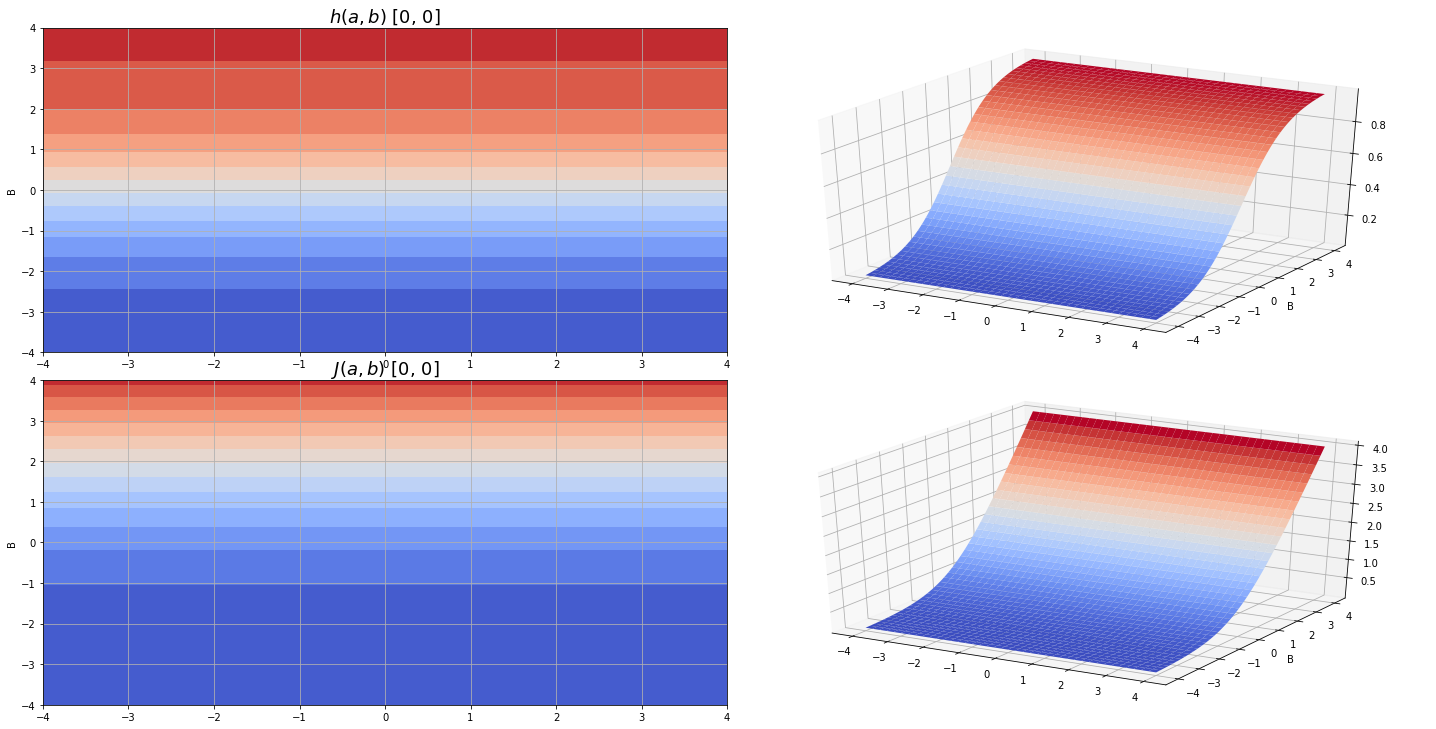

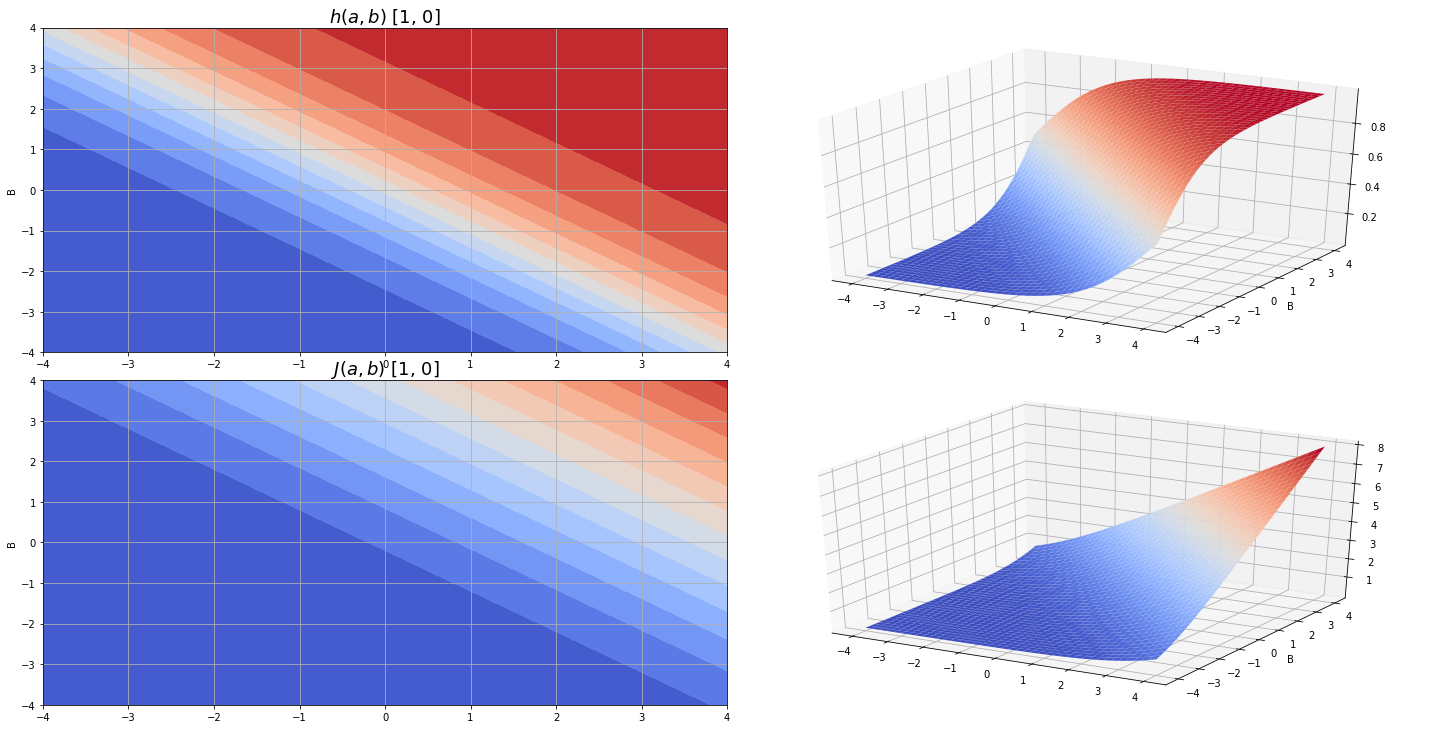

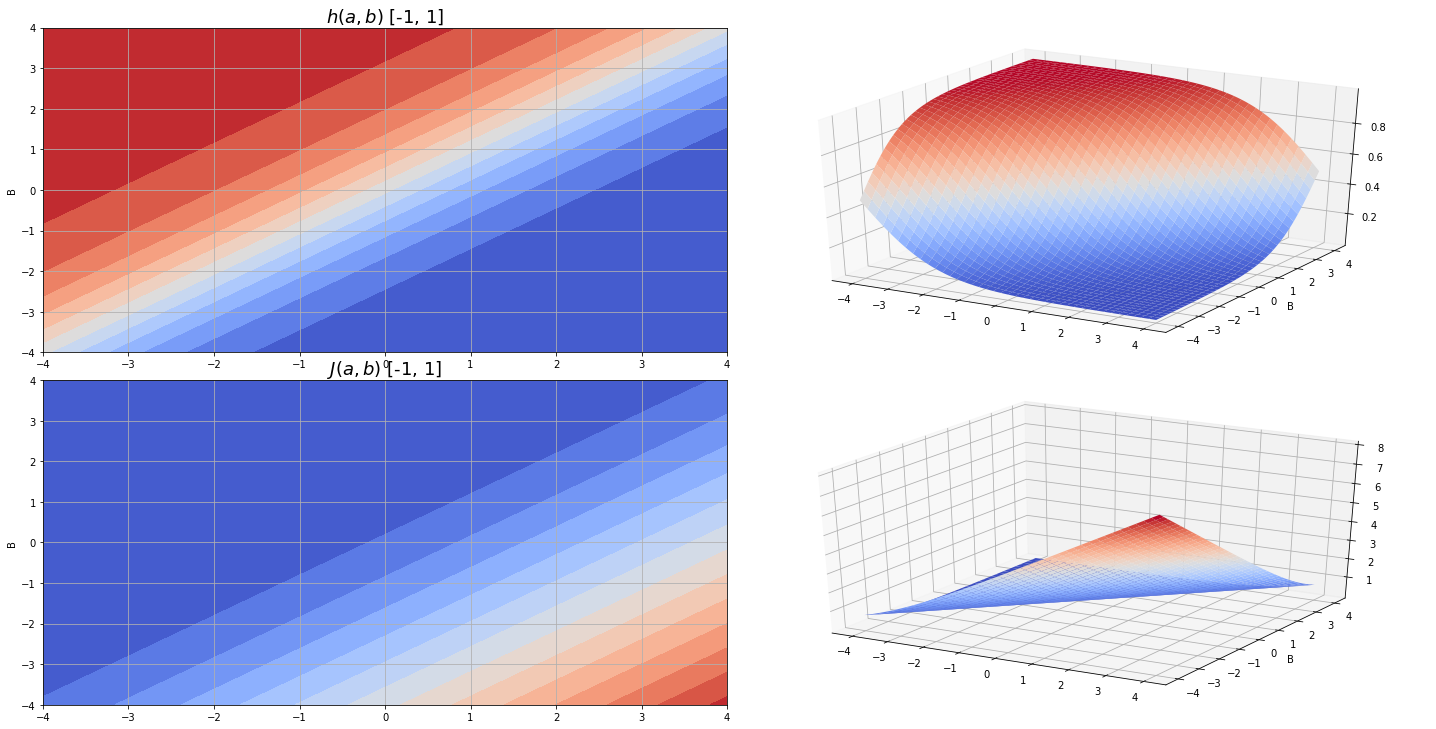

In [33]:
s1 = [0,0]
s2 = [1,0]
s3 = [-1,1]

for s in [s1, s2, s3]:
    plot_error_in_weight(s,str(s))

In [20]:
# Plots sum of errors for all samples in weights space.
# Samples are functions y(x).
def plot_sum_error_in_weight(samples, title):
    # y = ax + b
    # sample = [x , y]
    alim = [-4,4,.1]
    blim = [-4,4,.1]    
    a = np.arange(alim[0], alim[1]+alim[2], alim[2])
    b = np.arange(blim[0], blim[1]+blim[2], blim[2])
    A, B = np.meshgrid(a, b)

    
    error = 0
    for sample in samples:
            h_ = sample_func(sample[0])
            h = h_(A,B)
            J = error_func(h,sample[1])
            error = error + J

    J = error
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(a, b, J, cmap=cmap, levels=levels)
    
    ax0.set_ylim(alim[0], alim[1])
    ax0.set_xlim(blim[0], blim[1])
    ax0.set_ylabel("B")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title("$J(A,B) $"+title, fontdict=fontdic)
    ax0.grid()
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(A,B,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("B")
    
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

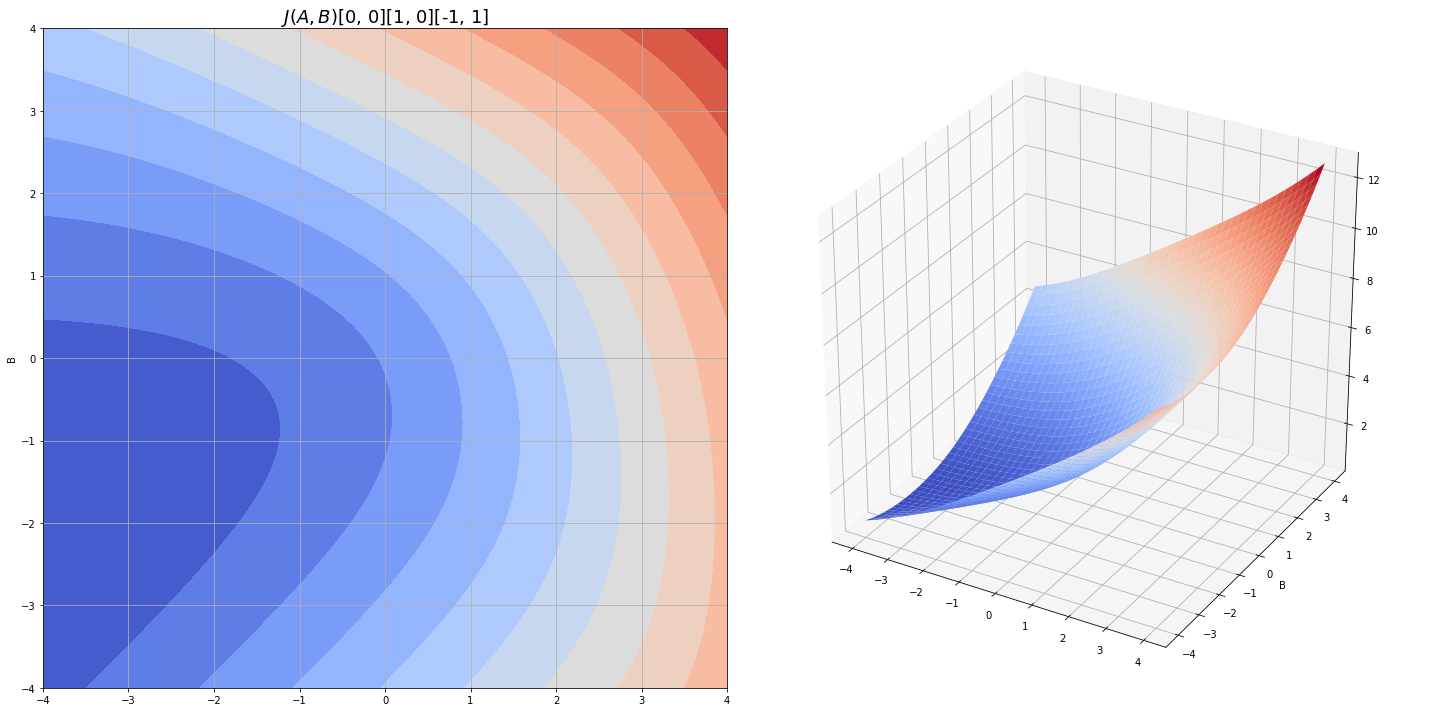

In [35]:
s1 = [0,0]
s2 = [1,0]
s3 = [-1,1]

s = [s1, s2, s3]
plot_sum_error_in_weight(s,str(s1) + str(s2) + str(s3))